<h2 style = "text-align: center; font-size: 40px;">Predictive_maintenance<h2>

<h2>Introduction</h2>

<p>La maintenance prédictive est une stratégie proactive qui utilise des données en temps réel et des analyses avancées pour prédire les défaillances d'équipements avant qu'elles ne surviennent. En surveillant les paramètres de fonctionnement, elle permet d'anticiper les pannes, réduisant ainsi les temps d'arrêt non planifiés et les coûts de maintenance. Cette approche optimise la disponibilité des équipements, prolonge leur durée de vie utile et améliore la sécurité des opérations. En collectant des données à partir de capteurs et en utilisant des modèles prédictifs, elle permet une planification efficace des interventions de maintenance préventive. Globalement, la maintenance prédictive offre une meilleure gestion des ressources, des économies de coûts et une augmentation de la productivité des entreprises.</p>

<h2>Objectifs</h2>

<p>L'objectif est de traiter un ensemble de données de maintenance prédictive afin de le rendre utilisable pour développer différents modèles de machine learning de classification des produits en défaillance ou non. Cela implique l'utilisation de multiples caractéristiques répertoriées dans l'ensemble de données pour prédire avec précision si un produit subira une défaillance ou non</p>

<h2>Index de la page</h2>
<ol>
    <li>Collecte de données</li>
    <li>Traitement des données</li>
    <li>Visualisation des données</li>
    <li>Initialisation du modèle</li>
    <li>Évaluation et optimisation du module de prédiction</li>
</ol>

<h1>1.Collecte de données</h1>

<h3>Source</h3>

Les données ont été collectées à partir du célèbre site web <b>Kaggle</b> qui contient de nombreux ensembles de données et informations utiles.<br>
Lien : <a href="https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification">predictive-maintenance-classification</a>

<h2>Importer les bibliothèque & dataset</h2>

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = "predictive_maintenance.csv"
data = pd.read_csv(dataset)
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [3]:
data.shape

(10000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
data['Type'].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [7]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [8]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<h3 style="text-align: center; color: #333;">Description de l'ensemble de données sur la maintenance prédictive</h3>
</ol>
<ul>
    <li><span style="font-weight: bold; color: #555;">Product ID</span>: C'est un identifiant unique attribué à chaque produit dans l ensemble de données.</li>
    <li><span style="font-weight: bold; color: #555;">Type</span>: Indique la catégorie à laquelle chaque produit appartient, classée en faible (L), moyen (M) ou élevé (H).</li>
    <li><span style="font-weight: bold; color: #555;">Air temperature [K]</span>: Cela représente la température de l'air en Kelvin.</li>
    <li><span style="font-weight: bold; color: #555;">Process temperature [K]</span>: Il s agit de la température du processus en Kelvin.</li>
    <li><span style="font-weight: bold; color: #555;">Rotational speed [rpm]</span>: C'est la vitesse de rotation de la machine, mesurée en tours par minute (RPM).</li>
    <li><span style="font-weight: bold; color: #555;">Torque [Nm]</span>: Le couple représente la force de rotation appliquée par la machine, mesurée en Newton-mètres (Nm).</li>
    <li><span style="font-weight: bold; color: #555;">Tool wear [min]</span>: Il s'agit du temps d'utilisation de l'outil, mesuré en minutes.</li>
    <li><span style="font-weight: bold; color: #555;">Target</span>: Indique si une défaillance s est produite ou non.</li>
    <li><span style="font-weight: bold; color: #555;">Failure Type</span>: Si une défaillance s'est produite, cette colonne indique le type de défaillance.</li>
</ul>

<h1>2.Traitement des données</h1>

<h2>Vérifier les valeur manquants</h2>

In [9]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [25]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

<h2>Vérifier les doublons</h2>

In [11]:
data.duplicated().sum().any()

False

In [75]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

<h2>Encoder les variables catégorique</h2>

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data['Product ID'] = ordinal_encoder.fit_transform(data[['Product ID']])
data['Type'] = ordinal_encoder.fit_transform(data[['Type']])
data['Failure Type'] = ordinal_encoder.fit_transform(data[['Failure Type']])
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003.0,2.0,298.1,308.6,1551,42.8,0,0,1.0
1,2,1003.0,1.0,298.2,308.7,1408,46.3,3,0,1.0
2,3,1004.0,1.0,298.1,308.5,1498,49.4,5,0,1.0
3,4,1005.0,1.0,298.2,308.6,1433,39.5,7,0,1.0
4,5,1006.0,1.0,298.2,308.7,1408,40.0,9,0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997.0,2.0,298.8,308.4,1604,29.5,14,0,1.0
9996,9997,1001.0,0.0,298.9,308.4,1632,31.8,17,0,1.0
9997,9998,9998.0,2.0,299.0,308.6,1645,33.4,22,0,1.0
9998,9999,1002.0,0.0,299.0,308.7,1408,48.5,25,0,1.0


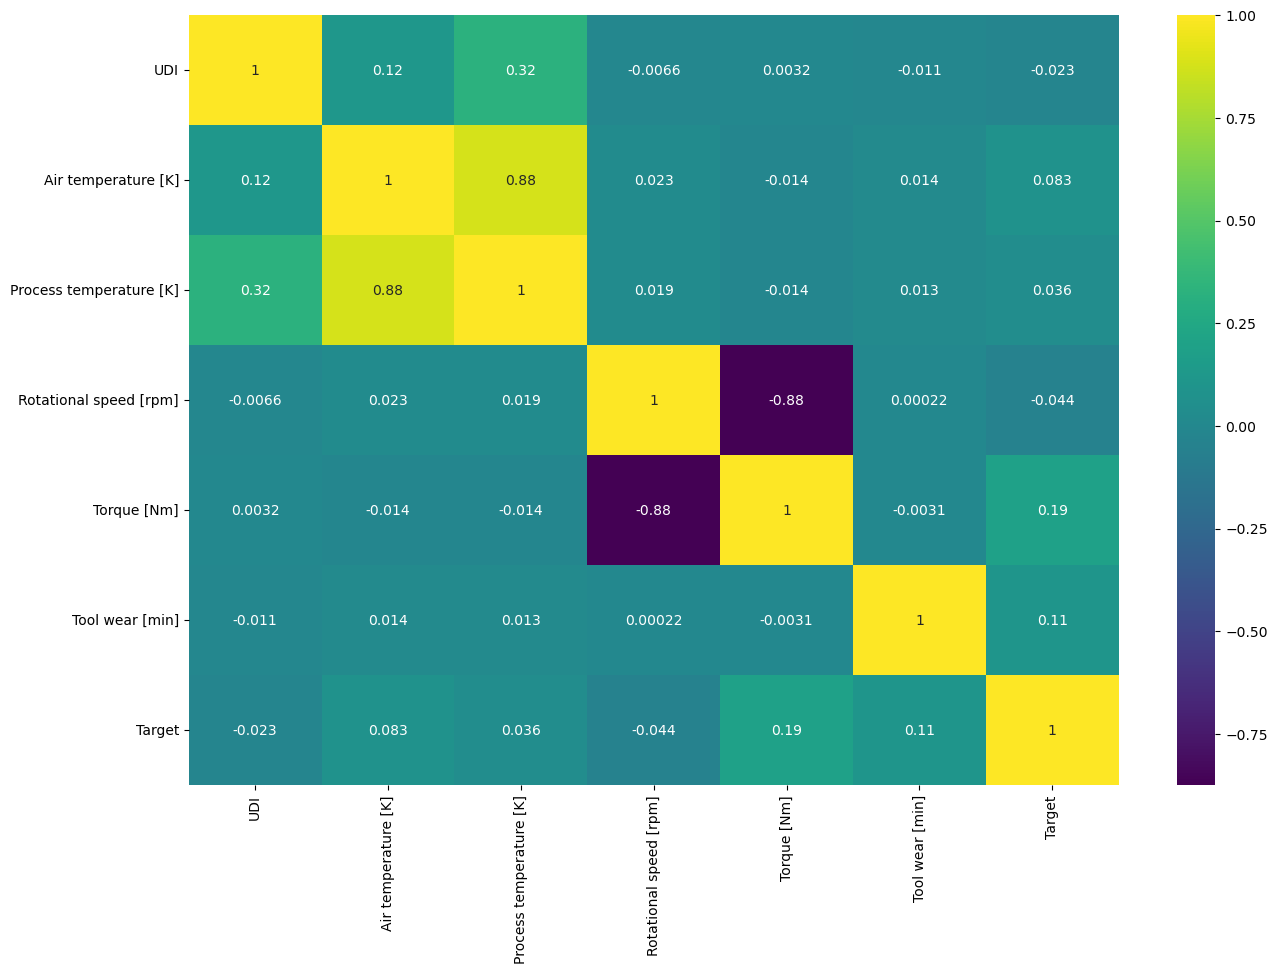

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True,cmap = "viridis")
plt.draw()

In [15]:
data_selected=data.drop(['Product ID',"UDI","Failure Type","Type"], axis=1)

In [74]:
data_selected.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
5,298.1,308.6,1425,41.9,11,0
6,298.1,308.6,1558,42.4,14,0
7,298.1,308.6,1527,40.2,16,0
8,298.3,308.7,1667,28.6,18,0
9,298.5,309.0,1741,28.0,21,0


<h1>3.Visualisation des données</h1>

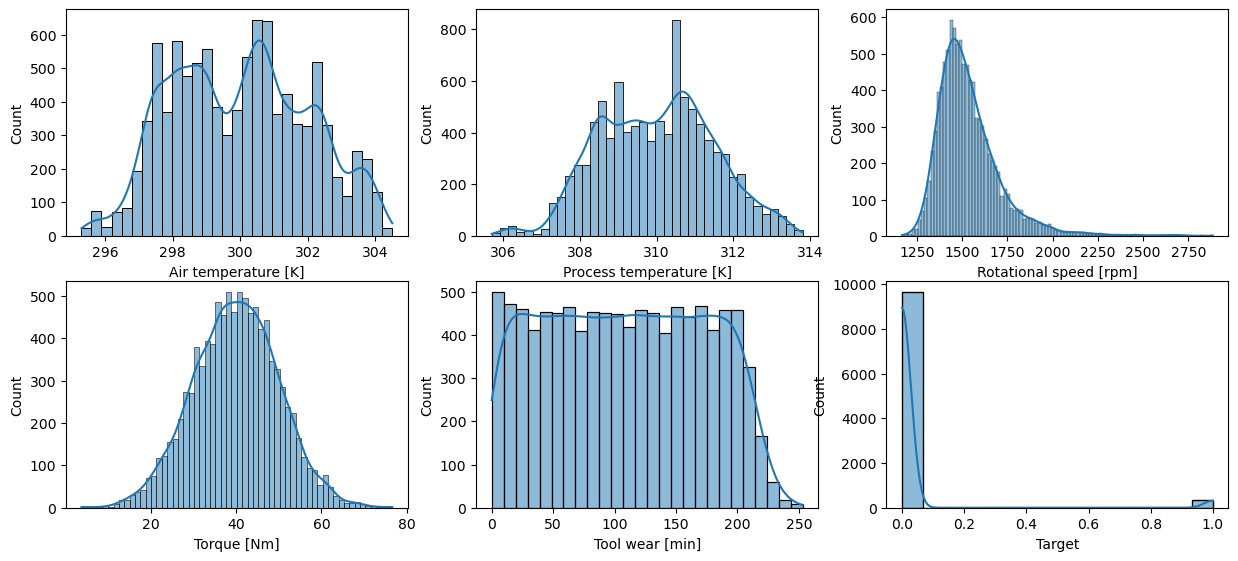

In [29]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data_selected.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data_selected[col],kde=True)

array([[<AxesSubplot:title={'center':'Air temperature [K]'}>,
        <AxesSubplot:title={'center':'Process temperature [K]'}>],
       [<AxesSubplot:title={'center':'Rotational speed [rpm]'}>,
        <AxesSubplot:title={'center':'Torque [Nm]'}>],
       [<AxesSubplot:title={'center':'Tool wear [min]'}>,
        <AxesSubplot:title={'center':'Target'}>]], dtype=object)

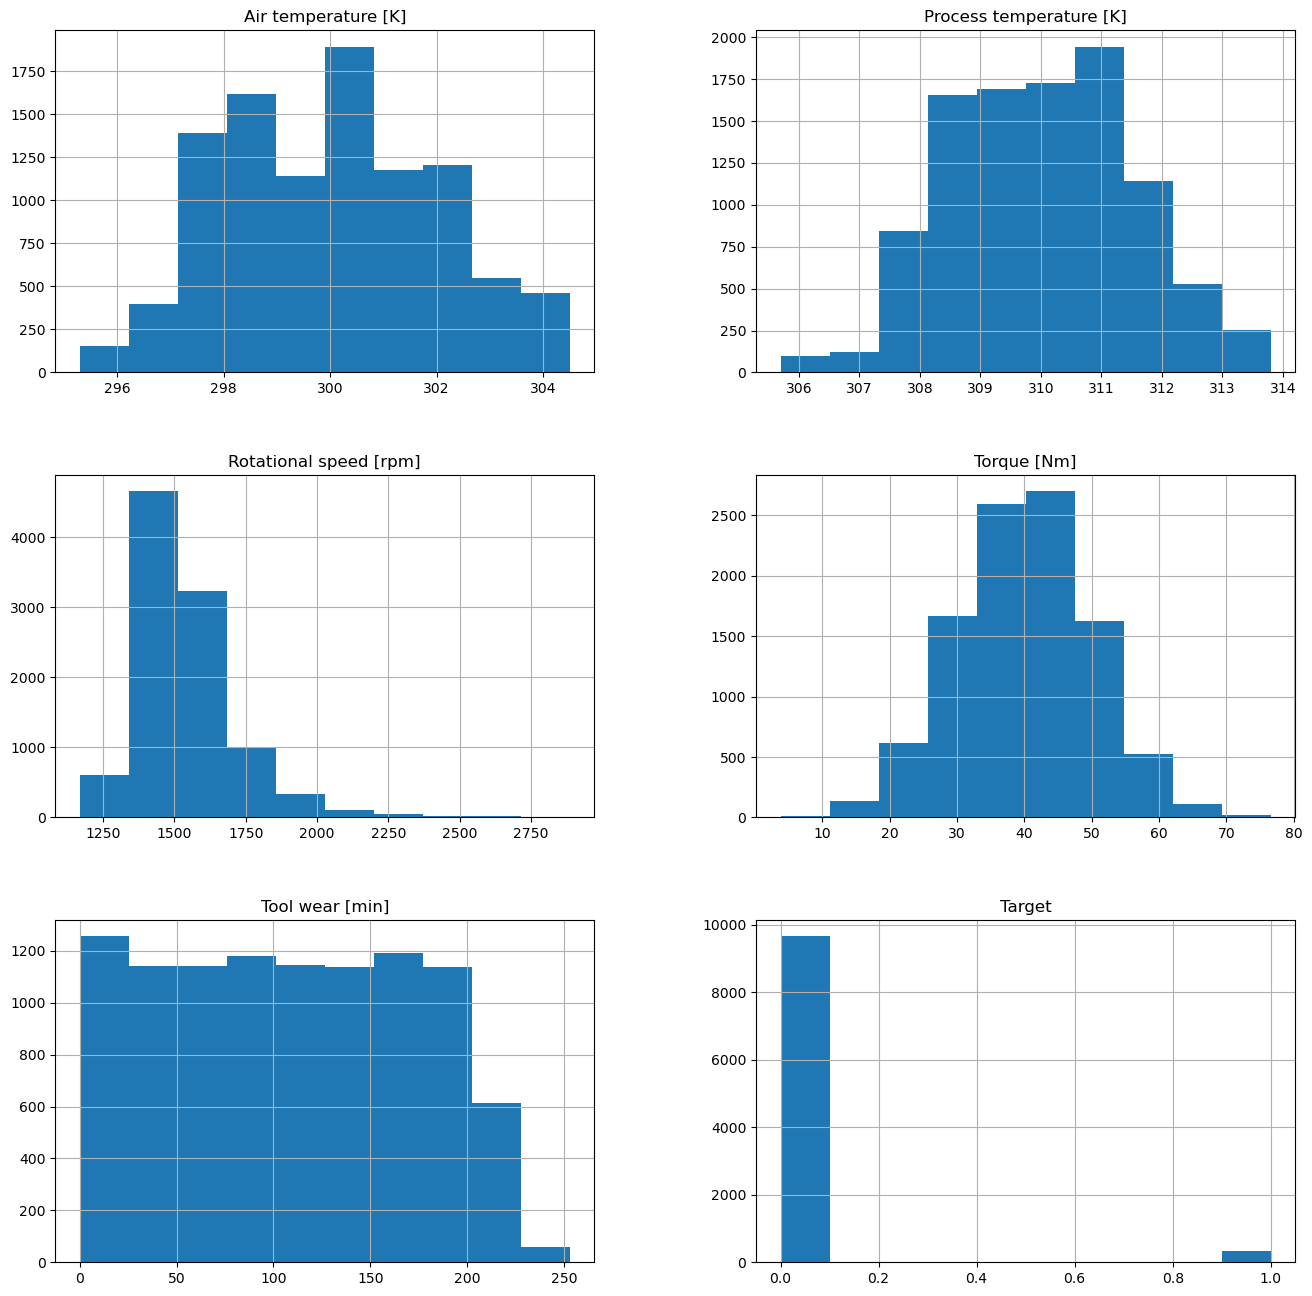

In [19]:
data_selected.hist(figsize=(16, 16))

In [20]:
data_selected.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


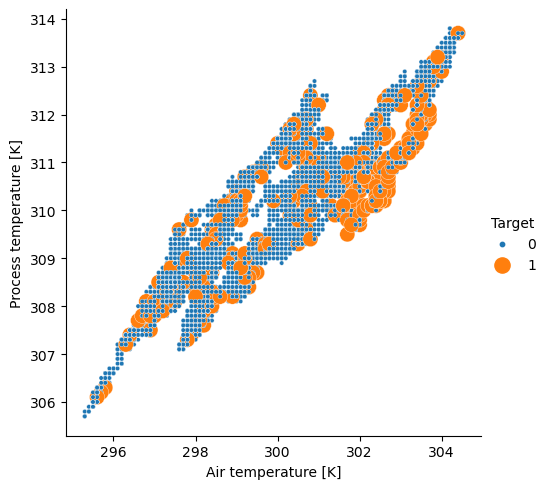

In [30]:
a = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Target",size="Target", sizes=(120, 10),data=data_selected)

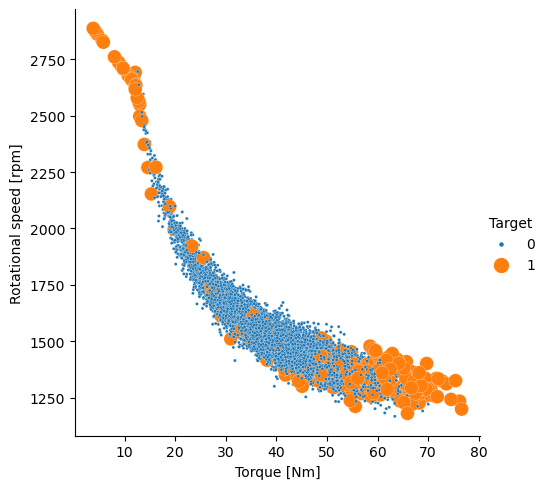

In [24]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",size="Target", sizes=(100, 5),data=data_selected)

In [35]:
data_selected

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


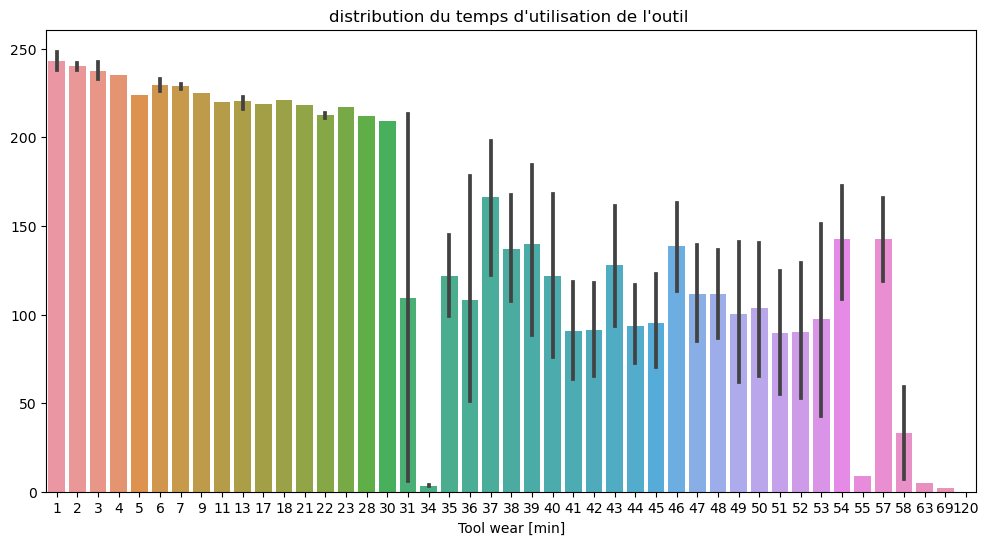

In [50]:
plt.figure(figsize = (12,6) )

target_genre = data_selected['Tool wear [min]'].value_counts()
barplot = sns.barplot(x = target_genre, y = target_genre.index)

plt.title("distribution du temps d'utilisation de l'outil ")
plt.show()

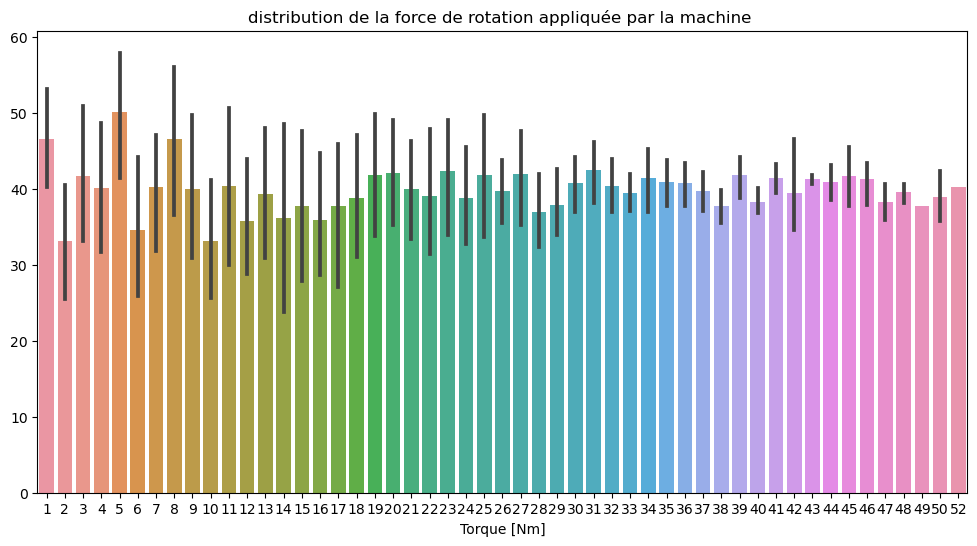

In [52]:
plt.figure(figsize = (12,6) )

target_genre = data_selected['Torque [Nm]'].value_counts()
barplot = sns.barplot(x = target_genre, y = target_genre.index)

plt.title("distribution de la force de rotation appliquée par la machine ")
plt.show()

In [61]:
speed_target = data_selected[['Air temperature [K]', 'Target']]
avg_speed_by_target = speed_target.groupby('Target')['Air temperature [K]'].mean()
avg_speed_by_target = pd.DataFrame(avg_speed_by_target)
print(avg_speed_by_target)

        Air temperature [K]
Target                     
0                299.973999
1                300.886431


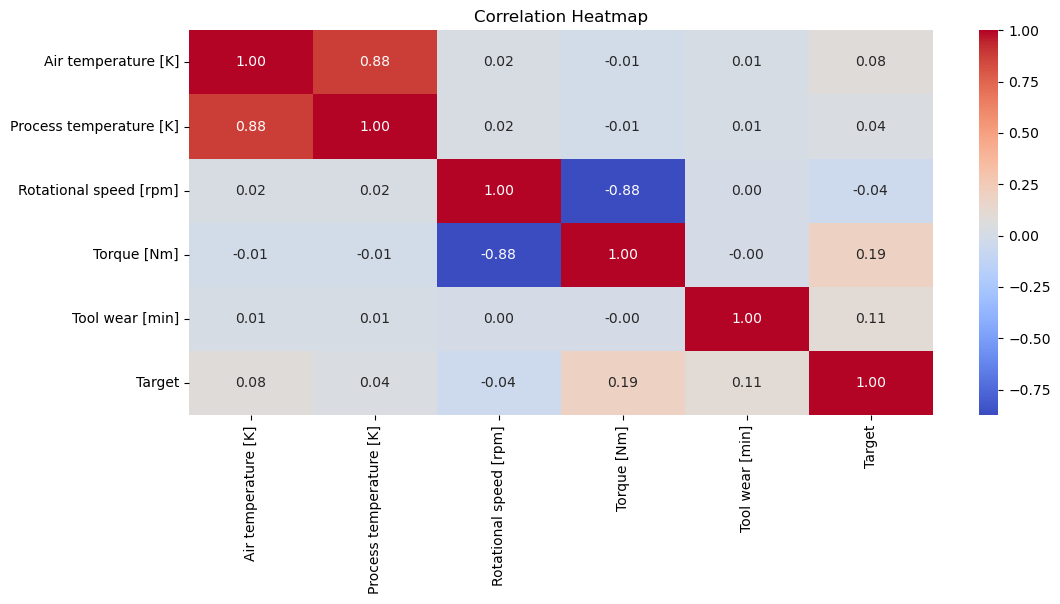

In [67]:
correlation_matrix = data_selected.corr()
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

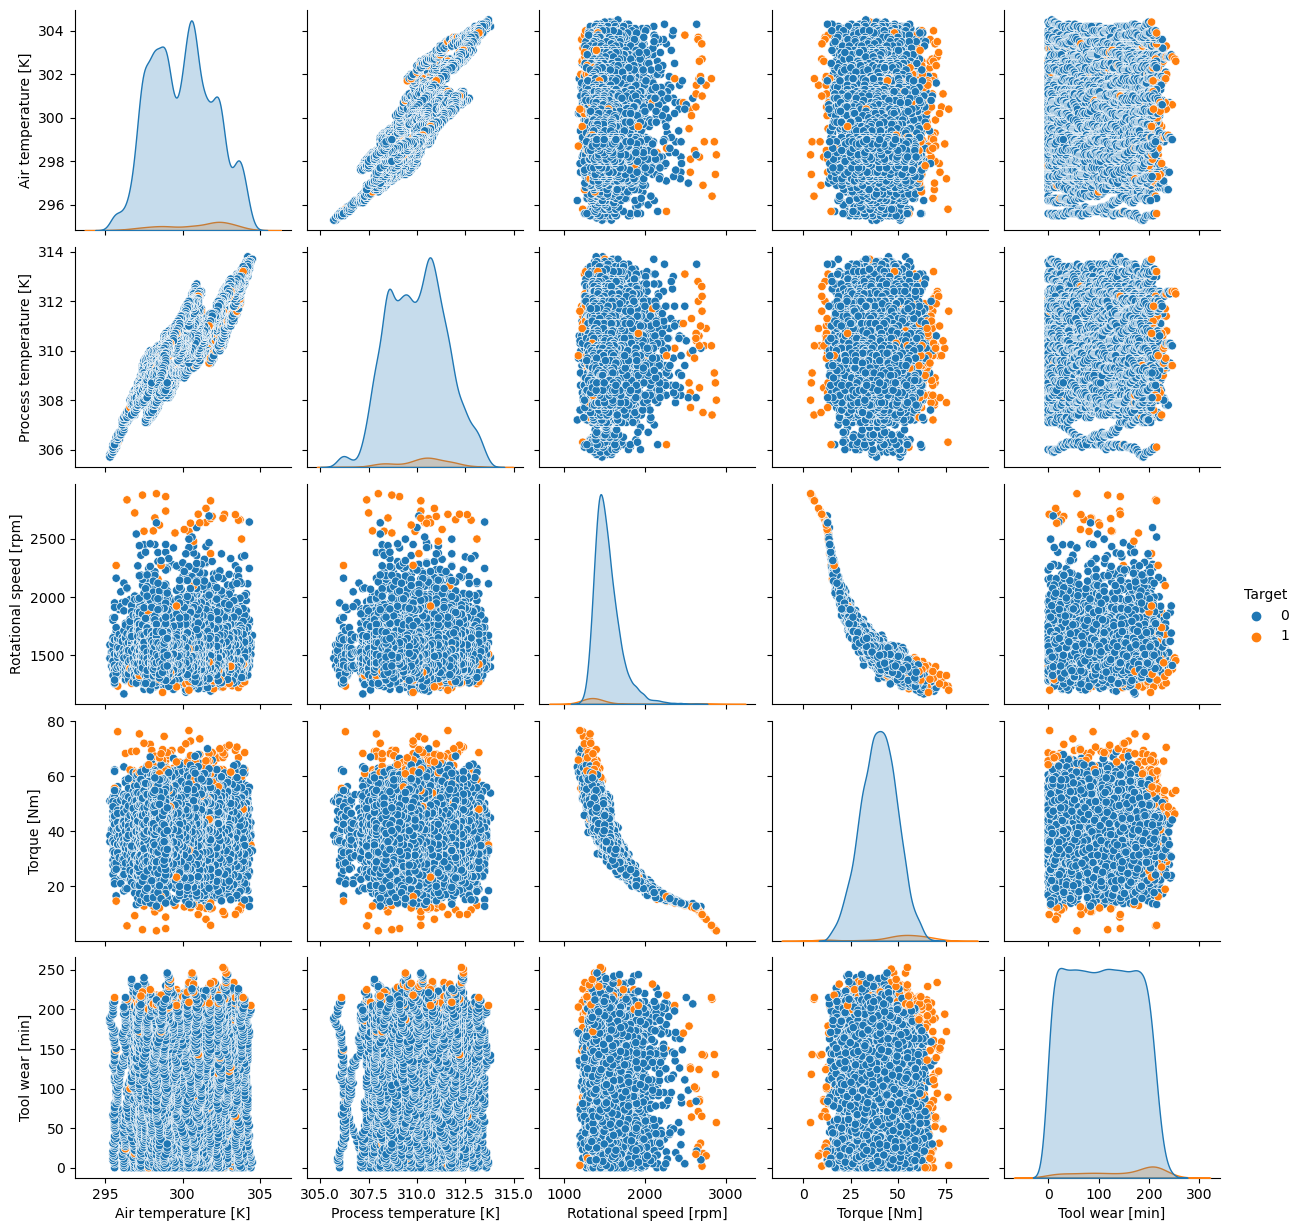

In [73]:
relationship_matrix = sns.pairplot(data_selected, hue='Target', corner=False, kind='scatter')

<h1>3.Initialisation du modèle</h1>

In [87]:
#séparer le variable cible et les variables d'entraînement
X = data_selected.drop(columns=['Target'])  
y = data_selected["Target"]  
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


**- Séparer les variables d'entraînement (80%) des variables de test (20%)."**

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.33, stratify=y)

<h1>**K-NN**<h1>

***Choisir le meilleur nombre de k à l'aide de la méthode du code.***

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

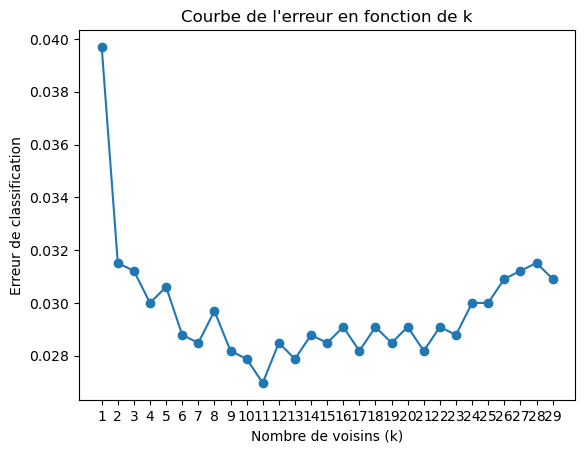

In [86]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
vect_err = []
k_values = range(1, 30)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    error = 1 - knn.score(X_test, y_test)
    vect_err.append(error)

plt.plot(k_values, vect_err, marker='o', linestyle='-')
plt.title("Courbe de l'erreur en fonction de k")
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Erreur de classification')
plt.xticks(k_values)
plt.show()

In [90]:
minimum=np.argmin(vect_err)
print(" le meilleur nombre de k est :",minimum+1)

 le meilleur nombre de k est : 11


In [119]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Matrice de confusion :\n", matrice_confusion)
print("****************************************")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Matrice de confusion :
 [[3185    3]
 [  86   26]]
****************************************
Accuracy: 0.973030303030303
Precision: 0.896551724137931
Recall: 0.23214285714285715
F1 Score: 0.3687943262411348


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


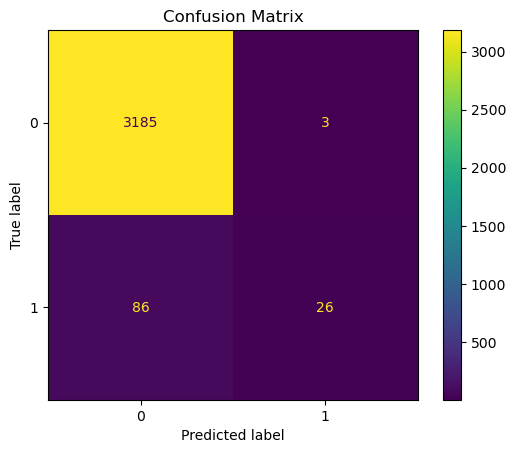

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


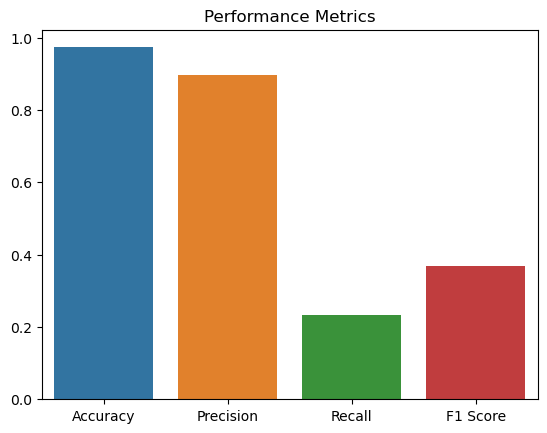

In [124]:
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Performance Metrics')
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
<style>
        table {
            border-collapse: collapse;
            width: 70%;
            margin: auto;
            font-size: 16px;
        }
        th, td {
            border: 1px solid black;
            padding: 12px;
            text-align: left;
        }
        th {
            background-color: #f2f2f2;
        }
    </style>
</head>
<body>
    <h2>Résultats du modèle KNN</h2>
    <table>
        <tr>
            <th>Mesure</th>
            <th>Valeur</th>
            <th>Interprétation</th>
        </tr>
        <tr>
            <td>Accuracy</td>
            <td>0.973</td>
            <td>L'exactitude mesure la proportion d'exemples correctement classés par le modèle parmi tous les exemples. Dans ce cas, le modèle a correctement classé environ 97.3% des exemples.</td>
        </tr>
        <tr>
            <td>Precision</td>
            <td>0.897</td>
            <td>La précision mesure la proportion d'exemples positifs correctement identifiés parmi tous les exemples classés comme positifs par le modèle. Ici, environ 89.7% des exemples classés comme positifs par le modèle étaient réellement positifs.</td>
        </tr>
        <tr>
            <td>Recall</td>
            <td>0.232</td>
            <td>Le rappel mesure la proportion d'exemples positifs correctement identifiés parmi tous les exemples réellement positifs. Environ 23.2% des exemples réellement positifs ont été correctement identifiés par le modèle.</td>
        </tr>
        <tr>
            <td>F1 Score</td>
            <td>0.369</td>
            <td>Le score F1 est une mesure combinée de la précision et du rappel. Il est utile lorsque les classes sont déséquilibrées. Le score F1 est de 0.369 dans ce cas, indiquant un équilibre entre la précision et le rappel.</td>
        </tr>
    </table>
    <h2>Matrice de confusion</h2>
    <p>La matrice de confusion montre comment le modèle a classé les exemples positifs et négatifs :</p>
    <table>
        <tr>
            <th></th>
            <th>Classe 0 (Négatif)</th>
            <th>Classe 1 (Positif)</th>
        </tr>
        <tr>
            <td>Classe 0 (Négatif)</td>
            <td>3185 (Vrais Négatifs)</td>
            <td>3 (Faux Positifs)</td>
        </tr>
        <tr>
            <td>Classe 1 (Positif)</td>
            <td>86 (Faux Négatifs)</td>
            <td>26 (Vrais Positifs)</td>
        </tr>
    </table>
    <p> le modèle a correctement classé la plupart des exemples (3185 vrais négatifs et 26 vrais positifs), mais a également fait quelques erreurs en classant à tort 3 exemples négatifs comme positifs et 86 exemples positifs comme négatifs.</p>
</body>
</html>


<h1>**Naive Bayes**<h1>

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred_nb)
accuracy = accuracy_score(y_test, y_pred_nb )
precision = precision_score(y_test, y_pred_nb )
recall = recall_score(y_test, y_pred_nb )
f1 = f1_score(y_test, y_pred_nb )
print("Matrice de confusion :\n", matrice_confusion)
print("****************************************")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Matrice de confusion :
 [[3147   41]
 [  87   25]]
****************************************
Accuracy: 0.9612121212121212
Precision: 0.3787878787878788
Recall: 0.22321428571428573
F1 Score: 0.2808988764044944


<h1>**Arbre de décision**<h1>

In [118]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)
y_pred_tree = tree_classifier.predict(X_test)
matrice_confusion = confusion_matrix(y_test, y_pred_tree)
accuracy = accuracy_score(y_test, y_pred_tree )
precision = precision_score(y_test, y_pred_tree )
recall = recall_score(y_test, y_pred_tree )
f1 = f1_score(y_test, y_pred_tree )
print("Matrice de confusion :\n", matrice_confusion)
print("****************************************")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Matrice de confusion :
 [[3157   31]
 [  36   76]]
****************************************
Accuracy: 0.9796969696969697
Precision: 0.7102803738317757
Recall: 0.6785714285714286
F1 Score: 0.6940639269406393


In [131]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [133]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output

def create_interactive_form():
    # Charger les données et entraîner le modèle KNN
#     data_selected = pd.read_csv('chemin_vers_votre_fichier.csv')  # Assurez-vous de spécifier le chemin correct
#     X = data_selected.drop(columns=['Target'])
#     y = data_selected["Target"]
    knn = KNeighborsClassifier(n_neighbors=11)
    knn.fit(X, y)

    # Créer des widgets pour saisir les caractéristiques
    air_temp = widgets.FloatText(description="Température de l'air (K):")
    process_temp = widgets.FloatText(description="Température du processus (K):")
    rotational_speed = widgets.FloatText(description="Vitesse de rotation (rpm):")
    torque = widgets.FloatText(description="Couple (Nm):")
    tool_wear = widgets.FloatText(description="Usure de l'outil (min):")
    predict_button = widgets.Button(description="Prédire")
    output = widgets.Output()

    # Fonction de prédiction
    def predict(_):
        with output:
            clear_output()
            prediction = knn.predict([[air_temp.value, process_temp.value, rotational_speed.value, torque.value, tool_wear.value]])
            print("La machine est", "en défiance" if prediction[0] else "non en défiance")

    # Définir la fonction de clic du bouton
    predict_button.on_click(predict)

    # Afficher le formulaire et le bouton
    display(air_temp, process_temp, rotational_speed, torque, tool_wear, predict_button, output)

# Appel de la fonction pour afficher le formulaire interactif
create_interactive_form()


FloatText(value=0.0, description="Température de l'air (K):")

FloatText(value=0.0, description='Température du processus (K):')

FloatText(value=0.0, description='Vitesse de rotation (rpm):')

FloatText(value=0.0, description='Couple (Nm):')

FloatText(value=0.0, description="Usure de l'outil (min):")

Button(description='Prédire', style=ButtonStyle())

Output()

In [134]:
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25
